In [1]:
import numpy as np

In [25]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X - self.mean
        
        cov = np.cov(X.T)
        
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        
        
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self,X):
        X = X - self.mean
        return np.dot(X,self.components.T)
        

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target

In [27]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [28]:
print("X-shape",X.shape)
print("shape of transformed X:",X_projected.shape)

X-shape (569, 30)
shape of transformed X: (569, 2)


In [29]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]

Text(0, 0.5, 'PC2')

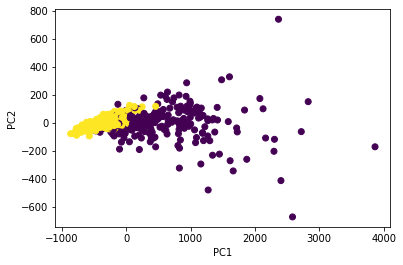

In [30]:
plt.scatter(x1,x2,c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")